# Class ConfidenceCorrection



In [ ]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

class ConfidenceCorrection():
    def __init__(self, PCA_Dimension=2, Conf_threshold = .95, random_state=42):
        self.n = PCA_Dimension
        self.Conf_threshold = Conf_threshold
        self.random_state = random_state

    def PCA(self, X):
        pca = PCA(n_components=self.n)
        pca.fit(X)
        return pca.transform(X)
    
    def GMM(self, X, y):
        gm = GaussianMixture(n_components=2, random_state=self.random_state).fit(X)
        result = gm.predict(X)
        prob = gm.predict_proba(X)

        return result, prob
    
    def relabel(self, initial, pred, prob):
        length = len(initial)
        if (initial == pred).sum() / length < .5:
            pred = self._reverse(pred)

        relabel = []
        for i in range(length):
            if pred[i] != initial[i] and max(prob[i]) > self.Conf_threshold:
                relabel.append(pred[i])
            else:
                relabel.append(initial[i])
        return np.array(relabel)

    def _reverse(self, labels):
        relabel = []
        for label in labels:
            if label == 1:
                relabel.append(0)
            else:
                relabel.append(1)
        return np.array(relabel)

# TEST for small portion of df


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd drive/MyDrive/DM_project/

[Errno 2] No such file or directory: 'drive/MyDrive/DM_project/'
/content/drive/.shortcut-targets-by-id/19X2MJ2rOS2mMHhugqwoCq9TxSVGnIH72/DM_project


In [ ]:
import numpy as np
import pandas as pd

file_path = os.getcwd() + '/data/relabel_performance.csv'
df = pd.read_csv(file_path, sep=',', header=None)

## Check data has been loaded correctly

In [ ]:
print("Original Data")
print(df)

X = df.iloc[:, :-1]
print("Features Extraction")
print(X)
y = df.iloc[:, -1]
print("Initial labels")
print(y)

Original Data
          0         1         2         3    ...       766       767  768  769
0    0.153107  0.086351  0.065527 -0.085436  ...  0.391052  0.409380  0.0  0.0
1   -0.063422  0.070663 -0.098856 -0.117528  ...  0.387893  0.357734  1.0  3.0
2   -0.036089  0.016041  0.049863 -0.265297  ...  0.363220  0.244354  2.0  2.0
3    0.083635  0.321674  0.053646 -0.175952  ...  0.404595  0.400022  2.0  2.0
4    0.110627  0.349697 -0.118823 -0.333534  ...  0.537655  0.130967  3.0  3.0
..        ...       ...       ...       ...  ...       ...       ...  ...  ...
205 -0.155652  0.137420  0.055720 -0.286184  ...  0.472283  0.191055  2.0  2.0
206 -0.129843  0.079037 -0.214782 -0.254599  ...  0.344395  0.263697  0.0  0.0
207 -0.123295  0.012304 -0.202374 -0.214907  ...  0.470928  0.382478  3.0  3.0
208 -0.113939  0.151439 -0.064276 -0.237631  ...  0.491038  0.239702  4.0  4.0
209  0.053520  0.102375 -0.121953 -0.290194  ...  0.503606  0.216607  1.0  1.0

[210 rows x 770 columns]
Features Ext

## Here is the example code for using CofidenceCorrection Class

In [ ]:
# Create object and assign hyperparameters
ConfCorr = ConfidenceCorrection(PCA_Dimension=2, Conf_threshold=.95)

# Use PCA to decompose the data's dimension
# Use GMM to cluster data groups
X_2d = ConfCorr.PCA(X)
pred, prob = ConfCorr.GMM(X_2d, y)
initial = y.to_numpy()

# Relabel the predicted result
relabel = ConfCorr.relabel(initial, pred, prob)

In [ ]:
# count how many labels have been relabeled
l = len(initial)

percentage = (relabel != initial).sum() / l

print("Relabel {:.2f}% of labels".format(percentage * 100))

Relabel 31.25% of labels


## DO NOT RUN CODES BELOW
**It will modify the dataset and export it as csv**

### Insert the relabel array into the last comlumn

In [ ]:
# # insert correction to the original dataframe
# df.insert(len(df.columns), len(df.columns), relabel)

### Export the dataset as csv

In [ ]:
# df.to_csv(os.getcwd() + '/RelabeledData/WholeDataset_95Conf.csv', index=False)

### Check if we export the csv file correctly

In [ ]:
# test = pd.read_csv(os.getcwd() + '/RelabeledData/WholeDataset_95Conf.csv', sep=',')
# print(test)

               0         1         2         3  ...       766       767  768  769
0       0.010114  0.095997 -0.128020 -0.121394  ...  0.353389  0.460498  0.0  0.0
1       0.317560  0.104374  0.163699 -0.327657  ...  0.509313  0.332283  0.0  1.0
2      -0.091589  0.170042  0.063761 -0.441049  ...  0.278878  0.203724  1.0  1.0
3       0.122691  0.008098  0.160613 -0.384411  ...  0.262266  0.255367  1.0  1.0
4       0.108125  0.085511  0.150400 -0.374653  ...  0.421712  0.216196  1.0  1.0
...          ...       ...       ...       ...  ...       ...       ...  ...  ...
147770  0.177124 -0.081742 -0.062012 -0.336368  ...  0.346662  0.174192  0.0  0.0
147771  0.100965  0.027470  0.011911 -0.263845  ...  0.373344  0.207477  0.0  0.0
147772 -0.019861 -0.124811  0.214698 -0.201864  ...  0.389719  0.297548  0.0  0.0
147773 -0.105824  0.095368 -0.062908 -0.100790  ...  0.256759  0.365466  0.0  0.0
147774  0.005942 -0.213766 -0.052954 -0.318085  ...  0.371154  0.361339  0.0  0.0

[147775 rows x 

## Let's try to do some Visualizations

In [ ]:
df = pd.read_csv(os.getcwd() + '/RelabeledData/SubDataset_95Conf.csv', sep=',')
df = df.iloc[:, :-1]

In [ ]:
print("Original Data")
print(df)

X = df.iloc[:, :-1]
print("Features Extraction")
print(X)
y = df.iloc[:, -1]
print("Initial labels")
print(y)

Original Data
             0         1         2         3  ...       765       766       767  768
0    -0.006200  0.070284  0.028636 -0.250071  ...  0.082910  0.414566  0.359919  1.0
1     0.207728  0.109641  0.116049 -0.170105  ...  0.070973  0.190636  0.227856  1.0
2    -0.062370  0.272636 -0.128166 -0.296919  ... -0.051060  0.385673  0.218866  1.0
3    -0.062440  0.156270 -0.157068 -0.290174  ... -0.043788  0.258672  0.238259  1.0
4     0.137891  0.047441 -0.023395 -0.269618  ...  0.060406  0.305067  0.332819  0.0
...        ...       ...       ...       ...  ...       ...       ...       ...  ...
1995  0.267878  0.012175 -0.111079 -0.282080  ...  0.094831  0.394871  0.314405  1.0
1996 -0.172903 -0.213130 -0.231888 -0.180587  ... -0.016662  0.240828  0.265536  0.0
1997  0.131287  0.014991  0.065739 -0.180021  ... -0.047638  0.382789  0.386884  0.0
1998  0.139634  0.148476 -0.066516 -0.340157  ... -0.048987  0.443618  0.234187  1.0
1999  0.174733 -0.127583  0.036640 -0.047726  ...  

In [ ]:
# Create object and assign hyperparameters
ConfCorr = ConfidenceCorrection(PCA_Dimension=2, Conf_threshold=.95)

# Use PCA to decompose the data's dimension
# Use GMM to cluster data groups
X_2d = ConfCorr.PCA(X)
pred, prob = ConfCorr.GMM(X_2d, y)
initial = y.to_numpy()

# Relabel the predicted result
relabel = ConfCorr.relabel(initial, pred, prob)

In [ ]:
print(relabel)

[0. 0. 2. 0. 3. 0. 1. 0. 4. 0. 1. 4. 2. 0. 1. 2. 0. 0. 0. 0. 2. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 3. 0. 0. 0. 2. 0. 0. 1. 0. 4. 0. 0. 0. 0. 0. 2. 0. 1.
 0. 0. 0. 0. 3. 3. 1. 0. 0. 2. 2. 0. 0. 2. 0. 0. 3. 2. 3. 1. 0. 1. 0. 0.
 0. 0. 0. 3. 2. 2. 1. 0. 2. 0. 0. 0. 1. 1. 1. 2. 0. 2. 0. 0. 2. 0. 0. 0.
 2. 3. 0. 0. 0. 0. 1. 2. 0. 0. 0. 1. 2. 0. 2. 3. 0. 0. 0. 0. 1. 4. 0. 0.
 4. 0. 2. 1. 3. 3. 0. 0. 3. 2. 0. 3. 2. 3. 0. 2. 3. 4. 1. 1. 2. 1. 1. 0.
 2. 4. 0. 1. 0. 0. 3. 0. 0. 0. 2. 3. 2. 0. 0. 2. 0. 0. 1. 2. 0. 0. 0. 3.
 0. 3. 0. 3. 2. 1. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 3. 1. 2. 2. 4. 0. 0. 3.
 0. 1. 0. 2. 2. 0. 0. 2. 1. 3. 0. 2. 2. 0. 0. 0. 4. 1.]


In [ ]:
def pltDataGenerator(X_2d, label):
    plt_data_g1 = []
    plt_data_g2 = []
    for i in range(len(X_2d)):
        if label[i] == 0:
            plt_data_g1.append(X_2d[i])
        else:
            plt_data_g2.append(X_2d[i])
    return pd.DataFrame(plt_data_g1), pd.DataFrame(plt_data_g2)

In [ ]:
plt_data_g1, plt_data_g2 = pltDataGenerator(X_2d, initial)

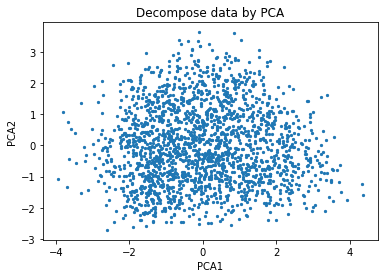

In [ ]:
import matplotlib.pyplot as plt

X_2d = pd.DataFrame(X_2d)
plt.scatter(X_2d[0], X_2d[1], cmap='viridis', s=5)
plt.title("Decompose data by PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

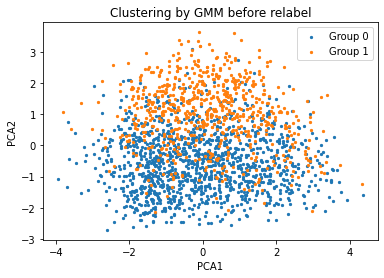

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(plt_data_g1[0], plt_data_g1[1], cmap='viridis', s=5)
plt.scatter(plt_data_g2[0], plt_data_g2[1], cmap='viridis', s=5)
plt.title("Clustering by GMM before relabel")
plt.legend(["Group 0", "Group 1"])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

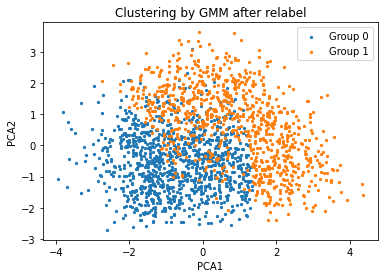

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(plt_data_g1[0], plt_data_g1[1], cmap='viridis', s=5)
plt.scatter(plt_data_g2[0], plt_data_g2[1], cmap='viridis', s=5)
plt.title("Clustering by GMM after relabel")
plt.legend(["Group 0", "Group 1"])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()